In [ ]:
%matplotlib inline

# Classification of Handwritten Digits

## Data Mining Team Names:
David Samuel,
James Hancock,
Alexandra Fisher, 
and Remy Lagrois

This notebook will explore a number of different models to classify the MNIST Handwritten Dataset.  You can get started with the dataset and benchmarks at https://www.kaggle.com/c/digit-recognizer.  

We will use the CRISP-DM framework seen below to iterate the data processing and modeling.  You can get a breif overview here: https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining

<a title="By Kenneth Jensen (Own work) [CC BY-SA 3.0 (http://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3ACRISP-DM_Process_Diagram.png"><img width="384" alt="CRISP-DM Process Diagram" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/512px-CRISP-DM_Process_Diagram.png"/></a>

<a id='table_of_contents'></a>
### Table of Contents
 [Business Understanding](#business_understanding)
 [Data Understanding](#data_understanding)
   - [Fig 1. Digit Frequency](#digit_frequency)  
 [Data Preparation](#data_preparation)          

[Logistic Regression](#logistic_regression)
  - [Cost Exploration](#cost_exploration)          
  - [Weights](#weights)    
  - [Pipeline](#pipeline) 

[Support Vector Machine](#support_vector_machine)                         
  - [Linear kernel](#linear_kernel)          
  - [Radial Basis Function (RBF) kernel](#rbf_kernel)    
  - [Third degree polynomial kernel](#polynomial_kernel)  
  - [Sigmoid kernel](#sigmoid_kernel)  

<a id='business_understanding'></a>
## Business Understanding 

This dataset was released and licensed for use in academia, and a purely knowledge based Kaggle competition which started in July, 2012, and will conclude at New Years Eve December, 2016.

The data was taken from the MNIST ("Modified National Institute of Standards and Technology").  This data has been extensively studied, which makes it an ideal candidate for learning machine learning techniques, repeatablility of testing, and new learning methodology.

The goal of the competition is to correctly classify the handwritten digits 0 through 9.  It is our job to process the image data, train a model using the training data, predict the labels of the test set, and report the accuracy.  We will iterate on this methodology through the use of various machine learning algorithms, and data transformations. 

<a id='data_understanding'></a>
## Data Understanding

This dataset is comprised of a training set of 42,000 labeled images, and 28,000 test images.  These images are each unique, and each contains 784 pixels, 0 through 255 representing a greyscale pixel.  The training set is labeled with the correct digit in the set of (0 through 9), while the testing set is unlabeled.  

In [2]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.html

import pandas as pd   # import pandas library as a variable, "pd"
import numpy as np    # import numpy library as "np"

print("Importing...")
# create data frame of training and testing sets

test = pd.read_csv("data/test.csv")              #  Sets testing object as a DataFrame
dataset = pd.read_csv("data/train.csv")             #  Set training object as a DataFrame
target = dataset[[0]].values.ravel()                #  Set target as the label values flattened to an ndarray(N-dimensional Array)                                            
train = dataset.iloc[:,1:].values                   #  Set train as the pixel values

print("Done!...")

Importing...
Done!...


## Here's a sample of the digits:
<img src="https://kaggle2.blob.core.windows.net/competitions/kaggle/3004/logos/front_page.png" alt="Drawing" style="width: 400px;"/>

<a id='digit_frequency'></a>
## Class Distribution 

Size of the training dataset: (42000, 785)
Size of the testing dataset: (42000, 785)
Number of unique classes: 10
The Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


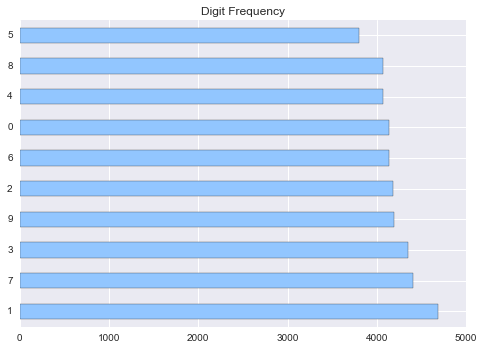

In [3]:
# http://seaborn.pydata.org/generated/seaborn.set.html?highlight=seaborn.set#seaborn.set

# seaborn.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
import matplotlib.pyplot as plt
import seaborn as sns       # import the seaborn library for a quick distribution plot
sns.set(color_codes=True)       # Reset color_codes to default

print 'Size of the training dataset:', dataset.shape
print 'Size of the testing dataset:', dataset.shape
print 'Number of unique classes:', len(dataset.label.unique())
print 'The Classes:', sorted(dataset.label.unique())
sns.set(style='darkgrid', palette='pastel')
c = pd.Series(target)
c = c.value_counts()
sns = c.plot(title="Digit Frequency", kind='barh')  # set seaborn object equal to pandas plot object and it will plot automatically
plt.show()



### The plot above shows the distribution of the labeled classes in the training Set

<a id='data_preparation'></a>
## Data Preparation

### Split the data into training and testing and show the distribution of the split

In [4]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

print("Importing...")
# create data frame of training and testing sets
trains = pd.read_csv("data/train.csv")
y = trains[[0]].values.ravel()
X = trains.iloc[:,1:].values

print("splitting...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)  # create x and y training set



Importing...
splitting...


C:\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


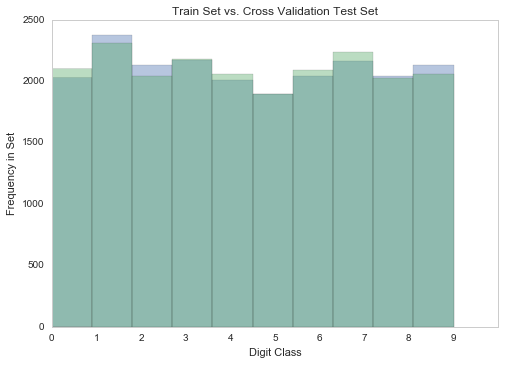

In [5]:
def splitter_display(train, test):
    sns.color_palette("Blues")
    sns.color_palette("husl", 8)
    sns.set_style("whitegrid", {'axes.grid' : False})
  
    ax = sns.distplot(train, bins=10, hist=True, kde=False)
    ax = sns.distplot(test, bins=10, hist=True, kde=False)
    ax.set(title="Train Set vs. Cross Validation Test Set", xlabel='Digit Class', ylabel='Frequency in Set', xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    ax.legend()
    plt.show() 

splitter_display(y_train, y_test)

## The Plot above shows differences in frequencies of the split in colored sections.  If the distribution appears normal, then it is ready for testing.

### The frequency of the split looks normal, ie. no noticable difference in color distribution above the bars.  

Note: This may not need to be run each time, as the train_test_split ensures a balanced class distribution

# Describe Final Dataset

In [6]:
import pandas as pd   # import pandas library as a variable, "pd"
import numpy as np    # import numpy library as "np"

print("Importing...")
# create data frame of training and testing sets

test = pd.read_csv("data/test.csv")              #  Sets testing object as a DataFrame
dataset = pd.read_csv("data/train.csv")             #  Set training object as a DataFrame
target = dataset[[0]].values.ravel()                #  Set target as the label values flattened to an ndarray(N-dimensional Array)                                            
train = dataset.iloc[:,1:].values                   #  Set train as the pixel values

print("Done!...")


Importing...
Done!...


In [7]:
# # convert to array, specify data type, and reshape
# target = target.astype(np.uint8)
# train = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
# test = np.array(testing).reshape((-1, 1, 28, 28)).astype(np.uint8)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


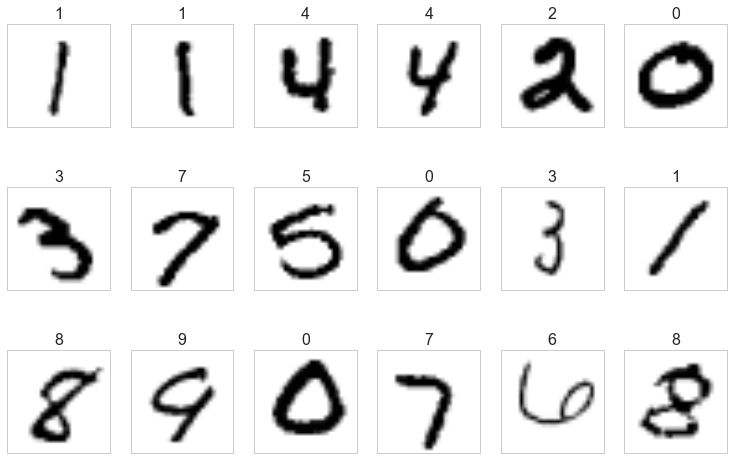

In [8]:
# The function below plots the images with their labels above
# Code sampled from ../03.%20Dimension%20Reduction.ipynb
%pylab inline
import pylab as pl
import numpy as np

# Set X and y to plot
X = train
y = target
names = np.sort(dataset.label.unique())


def plot_gallery(images, titles, h=28, w=28, n_row=3, n_col=6, cmap=pl.cm.binary):
    """Helper function to plot a gallery of portraits"""
    r = np.random.randint(len(images)-(n_row*n_col)-1)
    pl.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i+r].reshape((h, w)), cmap=cmap)
        pl.title(titles[i+r], size=16)
        pl.xticks(())
        pl.yticks(())

plot_gallery(X, names[y])

### The color below more clearly defines the centers and edges of the shapes

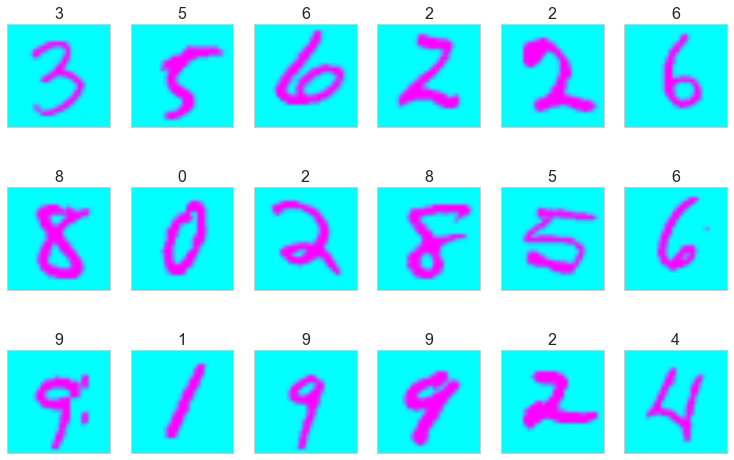

In [9]:
plot_gallery(X, names[y], 28, 28, cmap=pl.cm.cool)

# Modeling and Evaluation

In [10]:
# Let's try reducing dimensionality with PCA to 50 components 
# as we have seen from the eigenvectors from lab 1, 50 should be sufficient

# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform

# sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, 
# svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)

from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.decomposition import PCA

print("Fitting PCA...")
n_comp = 50

# whitening was recommended, as well as arpack solver

pca = PCA(n_components=n_comp, whiten=True, svd_solver='auto')

# Set fitted PCA object
trainer = pca.fit_transform(X_train)
tester = pca.fit_transform(X_test)

evr = pca.explained_variance_ratio_
print sum(evr), "Percent Variance Explained by", n_comp, 'PCs'

# Create cumulative series to plot
cum = 0
d = []
evr = pca.explained_variance_ratio_

for i in range(50):  
    cum += evr[i]
    d.append(cum)

print("Done!")

Fitting PCA...
0.826498637924 Percent Variance Explained by 50 PCs
Done!


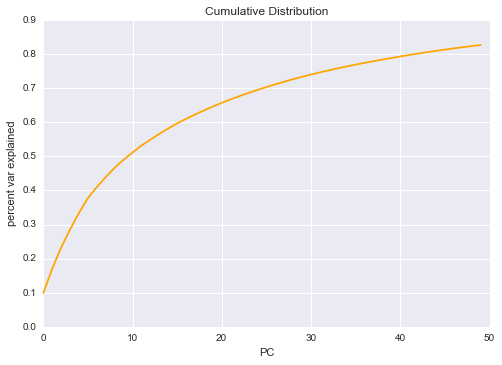

In [11]:
plt.plot(d, color='orange', label=True)
plt.title('Cumulative Distribution')
plt.xlabel('PC')
plt.ylabel('percent var explained')
plt.show()

In [12]:
# from the tutorial: http://www.kaggle.com/c/datasciencebowl/details/tutorial 
def multiclass_log_loss(y_true, y_pred, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    https://www.kaggle.com/wiki/MultiClassLogLoss

    Parameters
    ----------
    y_true : array, shape = [n_samples]
            true class, integers in [0, n_classes - 1)
    y_pred : array, shape = [n_samples, n_classes]

    Returns
    -------
    loss : float
    """
    predictions = np.clip(y_pred, eps, 1 - eps)

    # normalize row sums to 1
    predictions /= predictions.sum(axis=1)[:, np.newaxis]

    actual = np.zeros(y_pred.shape)
    n_samples = actual.shape[0]
    actual[np.arange(n_samples), y_true.astype(int)] = 1
    vectsum = np.sum(actual * np.log(predictions))
    loss = -1.0 / n_samples * vectsum
    return loss
print("multiclass_log_loss() method loaded..")

multiclass_log_loss() method loaded..


In [13]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt

dt_clf = DecisionTreeClassifier()

print 'Training Once:'
# train the decision tree algorithm
dt_clf.fit(X_train,y_train)
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)

print 'Accuracy:', mt.accuracy_score(y_test,yhat)
print 'Log Loss:', multiclass_log_loss(y_test, class_probabilities)

n_comp = 50
pca = PCA(n_components=n_comp, whiten=True, svd_solver='auto')

print 'Training Once:'
# transform the data using pca
pca.fit_transform(X_train)

# train the decision tree algorithm
dt_clf.fit(X_train,y_train)
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)

print 'Accuracy:', mt.accuracy_score(y_test,yhat)
print 'Log Loss:', multiclass_log_loss(y_test, class_probabilities)

Training Once:
Accuracy: 0.84719047619
Log Loss: 5.27785397387
Training Once:
Accuracy: 0.846095238095
Log Loss: 5.31568215754


# don't use PCA reduction with the decision tree classifier

Training Once:
Accuracy: 0.803571428571
Log Loss: 6.78440250614


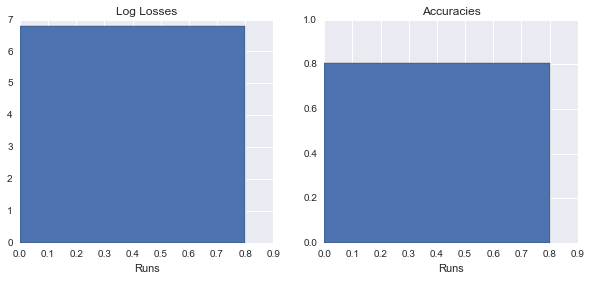

In [14]:
log_losses = []
accuracies = []
params = []

from matplotlib import pyplot as plt
%matplotlib inline

# how to make it generalize a bit better? 
# dt_clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
#  min_samples_leaf=1, min_weight_fraction_leaf=0.0,
#  max_features=None, random_state=None, max_leaf_nodes=None, 
#  min_impurity_split=1e-07, class_weight=None, presort=False)
# defaults
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                max_features=None, max_leaf_nodes=None)

# # overwrite with prepruning methods
# dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
#                                 min_samples_split=1000, min_samples_leaf=1, 
#                                 max_leaf_nodes=None)


print 'Training Once:'

# transform the data using pca
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# train the decision tree algorithm
dt_clf.fit(X_train,y_train)
yhat = dt_clf.predict(X_test)
class_probabilities = dt_clf.predict_proba(X_test)

# get accuracy and log loss of this training
acc = mt.accuracy_score(y_test,yhat)
ll = multiclass_log_loss(y_test, class_probabilities)
print 'Accuracy:', acc
print 'Log Loss:', ll

# save accuracy, log loss, and params of run
log_losses.append(ll)
accuracies.append(acc)
params.append(dt_clf.get_params())
    
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(range(len(log_losses)),log_losses)
plt.title('Log Losses')
plt.xlabel('Runs')

plt.subplot(1,2,2)
plt.bar(range(len(accuracies)),accuracies)
plt.title('Accuracies')
plt.xlabel('Runs')
plt.ylim([0,1])

plt.show()

# Use only Gini criterion, as entropy is too sensitive for this type of image classification

## We will now run PCA on Logistic Regression and SVM models, as we have learned from previous trials, reducing the dimensionality of the features will improve our model's predictive power.

In [ ]:
# The function below plots a confusion matrix
#
from datetime import datetime as dt; start = dt.now()
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# # Create a DF from corr    
# conf = pd.DataFrame(conf)
# corr = conf.corr()

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# # heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, 
# #         linecolor='white', 
# #         cbar=True, cbar_kws=None, cbar_ax=None, square=False, ax=None, xticklabels=True, yticklabels=True, mask=None, **kwargs)

# ax = sns.heatmap(corr)

Automatically created module for IPython interactive environment


In [ ]:
from datetime import datetime as dt
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics as mt
import multiprocessing
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

# sklearn.linear_model.LogisticRegressionCV(Cs=10, fit_intercept=True, cv=None, dual=False, 
# penalty='l2', scoring=None, solver='lbfgs', tol=0.0001, max_iter=100, class_weight=None, 
# n_jobs=1, verbose=0, refit=True, intercept_scaling=1.0, multi_class='ovr', random_state=None)

start = dt.now()

skf = StratifiedKFold(n_splits=3, shuffle=False, random_state=None)
# l2 regulariazation only works with 'multinomial' and solvers: ‘sag’, and ‘lbfgs’
# using 10 fold cross validation

c = LogisticRegressionCV(Cs=10, fit_intercept=True, cv=skf, n_jobs=-1, penalty='l2', 
                              solver='sag', tol=0.00001, class_weight=None, 
                              verbose=0, refit=True, intercept_scaling=1.0, multi_class='multinomial')

# print 'maximum probability', [x for max(x) in prob]
print("Sag Solver...")
print("Fitting Logit...")
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy is', mt.accuracy_score(y_test,y_hat)*100, '%'

print multiprocessing.cpu_count(), 'CPUs Ran in', dt.now() - start, 'minutes' 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.cool)

prob = c.predict_proba(tester)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)


Sag Solver...
Fitting Logit...


# The plot above shows high confusion with the 6's and 0's respecitively.  Also, 7 and 1 have been highly confused.  

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import numpy as np
from sklearn import metrics as mt

# Will try lbfgs
start = dt.now()

# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

c = LogisticRegressionCV(solver='lbfgs', cv=skf, penalty='l2', 
        multi_class='multinomial', tol=0.00001)


print("lbfgs Solver...")
print("Fitting Logit...")
c.fit(trainer, y_train)

print("predicting...")
y_hat = c.predict(tester)

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.BuPu)

prob = c.predict_proba(tester)
print 'Probabilities', prob
print 'maximum probability', np.max(prob)

## 'sag' solver and multinomial class wins at < 50 seconds with 37.00% accuracy and 10 fold cross validation.  The confusion Matrices show 

When the tests above were being performed it was realized that the data was possibly consistent of too many variables, as it took quite some time to perform the log regrssion and other features. With that it was determined that a PCA for dimension reduction would be of great use of tools for this project.

The code below is pulled from a Kaggler, and provides functions for a PCA and logistic regression model that is over 90% accurate.

Now it is time to plot the weights to show where the numbers might lie in determination of which attributes are most important when predicting. As stated presviouly this data set is a little odd in determination of variable selection however we can see that the pixels in the middle of the data set, show to a much greater extent where the possible future values may lie.

Below a pipeline is used to help to a greater extent which values are the largest determinents. A pipline essentially applies a list of transforms along with a final estimator. The final estimator only needs to implement fit. From this we can determine which of the variables is most vital for model creation. As shown in the output the values toward the middle of the pixel scale appear to be the most likely determininents which is to be expected as most of the items would be drawn centered arond the middle of the box.

# Support Vector Machines¶
Scaled attributes from the training and testing data are now used for investigating associated weights and support vectors. This is done by using support vector machines (SVMs) on the data and playing with the parameters.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split  # We will try the method train_test_split instead of ShuffleSplit

# set X and y, and testing data and normalize by 255.0 pixels

# try holding out the test set at 50/50
# random state can be changed, but will calibrate with 0
    
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  # create x and y training set

print "Done Splitting."


In [ ]:
from sklearn.decomposition import PCA
n_comp = 50

# whitening was recommended
pca = PCA(n_components=n_comp, whiten=True)

print("Fitting...")
# Set fitted PCA object
trainer = pca.fit_transform(X_train)
tester = pca.fit_transform(X_test)

print("done!")


# Try a 3rd Degree polynomial

In [ ]:
# Reuse X and y from PCA from above
from datetime import datetime as dt

from sklearn.svm import SVC
from sklearn import metrics as mt

# (C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
# class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

# adding max_iter or balancing slows things down and hurts accuracy, so leave it at defaults, and


start = dt.now()
s = SVC(C=0.5, kernel='poly', degree=3, probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'
time = dt.now() - start
print 'CPU Time: ', time


 
conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob   
# Compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens)

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(conf, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()


# The CM above shows confusion with 7--3, 3--9, 1--9 and particular trouble with 6;  it is possibly overfitting, C and tol could be turned down.  Edge detection is going to be key for classification

In [ ]:
# Linear Kernel with tolerance upped by order of magnitude
from datetime import datetime as dt

from sklearn.svm import SVC
from sklearn import metrics as mt

start = dt.now()
weights1 = {0:.05,1:.15, 2:0.05, 3:0.125, 4:0.125, 5:0.1, 6:0.1, 7:0.15, 8:0.1, 9:0.05}
s = SVC(C=0.5, kernel='linear', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 

print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 

conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges)


## simillar issues 7--3, 3--9, 9--1 are having trouble, but more sparse than polynomial.  Less fitting and sensitivity as tol and C went down.  

In [ ]:
# rbf kernel 
start = dt.now()

s = SVC(C=0.5, kernel='rbf', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(train, y_train) 

print("Predicting...") 
y_hat = s.predict(test) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Reds)



In [ ]:
# rbf kernel 
start = dt.now()

s = SVC(C=0.5, kernel='rbf', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.Purples)



# SVM with the 'rbf' solver outperforms the other solvers, and the logit in this arena due to multidimensional flexibility.


In [ ]:
# sigmoid kernel 
start = dt.now()
s = SVC(C=0.5, kernel='sigmoid', probability=True, tol=0.00001)
print("Training SVM..."), 
s.fit(trainer, y_train) 

print("Predicting...") 
y_hat = s.predict(tester) 
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'

print 'CPU Time: ', dt.now() - start

conf = mt.confusion_matrix(y_test,y_hat)
prob = c.predict_proba(tester)
print 'Probabilities', prob 
conf = mt.confusion_matrix(y_test,y_hat)
plot_confusion_matrix(conf, [x for x in range(10)],
                      normalize=False,
                      title='Confusion matrix',
                      cmap=plt.cm.YlGn)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model.stochastic_gradient import SGDClassifier
#from sklearn.linear_model import SGDClassifier

# we create 1000 separable points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = SGDClassifier(n_iter=100, alpha=0.01)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - clf.intercept_[0] / w[1]


# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

ww = wclf.coef_[0]
wa = -ww[0] / ww[1]
wyy = wa * xx - wclf.intercept_[0] / ww[1]

# plot separating hyperplanes and samples
h0 = plt.plot(xx, yy, 'k-', label='no weights')
h1 = plt.plot(xx, wyy, 'k--', label='weights')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.legend()

plt.axis('tight')
plt.show()

# RFB

In [ ]:
# Code adapted from https://www.kaggle.com/c/digit-recognizer/forums/t/2299/getting-started-python-sample-code-random-forest

# from sklearn.ensemble import RandomForestClassifier
# import numpy as np
# import pandas as pd

# # create the training & test sets, skipping the header row with [1:]
# dataset = pd.read_csv("data/train.csv")
# target = dataset[[0]].values.ravel()
# train = dataset.iloc[:,1:].values
# test = pd.read_csv("data/test.csv").values

# # create and train the random forest
# # multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
# rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
# print("Fitting...")
# rf.fit(train, target)
# pred = rf.predict(test)

# np.savetxt('data/submission_rand_forest.csv', np.c_[range(1,len(test)+1),pred], 
#            delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

# print 'CPU Time: ', dt.now() - start
# print("Benchmark Created!")

# use training subset set to train then cross validate on testing subset

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from datetime import datetime as dt

print("splitting...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)  # create x and y training set

start=dt.now()
rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
print("Fitting...")
%time rf.fit(X_train, y_train)

y_hat = rf.predict(X_test)
print 'Accuracy', mt.accuracy_score(y_test,y_hat)*100, '%'


## using the random forest benchmark to train, Cross Validate on the original training set 

# Data Preprocessing

In [ ]:
# convert to array, specify data type, and reshape
# create the training & test sets, skipping the header row with [1:]
import pandas as pd
import numpy as np
dataset = pd.read_csv("data/train.csv")
target = dataset[[0]].values.ravel()
train = dataset.iloc[:,1:].values
test = pd.read_csv("data/test.csv").values


# target = target.astype(np.uint8)
# train = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
# test = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

target = target.astype(np.uint8)
train = np.array(train).reshape((-1, 1, 28, 28)).astype(np.uint8)
test = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

plt.imshow(train[1729][0], cmap=cm.binary) # draw the picture
plt.grid(False)
plt.show()

In [ ]:
from sklearn.neighbors import BallTree

tree = BallTree(X, leaf_size=2)

